In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("MILK_PRODUCTION.csv")

In [28]:
df.head()

,Month,Monthly milk production (pounds per cow),Unnamed: 2
0,1962-01,589,NaN
1,1962-02,561,NaN
2,1962-03,640,NaN
3,1962-04,656,NaN
4,1962-05,727,NaN


In [29]:
df = df.rename(columns={'Month':'Month','Monthly milk production (pounds per cow)': 'Milk in pounds per cow'})

In [30]:
df=df.drop(columns=['Unnamed: 2'])

In [31]:
df

,Month,Milk in pounds per cow
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
5,1962-06,697
6,1962-07,640
7,1962-08,599
8,1962-09,568
9,1962-10,577


In [32]:
df.set_index('Month',inplace=True)

In [33]:
df

,Milk in pounds per cow
Month,
1962-01,589
1962-02,561
1962-03,640
1962-04,656
1962-05,727
1962-06,697
1962-07,640
1962-08,599
1962-09,568


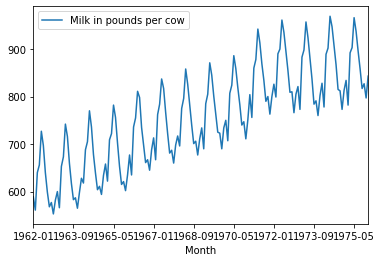

In [34]:
df.plot()

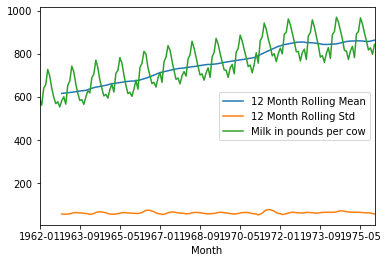

In [35]:
timeseries = df ['Milk in pounds per cow']
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  


<Figure size 432x288 with 0 Axes>

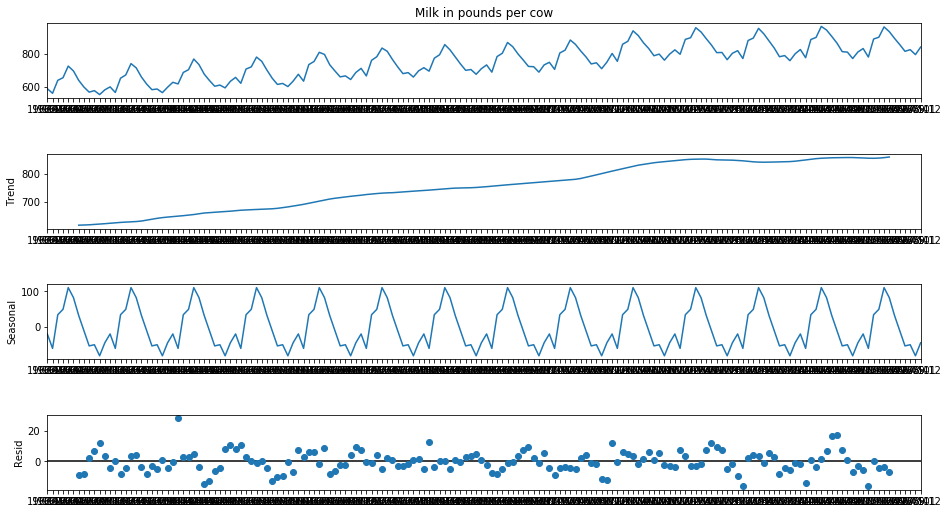

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Milk in pounds per cow'], freq=12)  
figure = plt.figure()  
figure = decomposition.plot()  
figure.set_size_inches(15, 8)


In [37]:
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(df['Milk in pounds per cow'])
print ('ADF Test:')
labels = ['ADF Statistic','p-value','No. of Lags Used','Number of Observations Used']

for value,label in zip(test_result,labels):
    print (label+': '+str(value))
if test_result[1] <= 0.05:
    print ("Reject null hypothesis and data is stationary")
else:
    print ("Fail to reject H0 thereby data is non-stationary ")

ADF Test:
ADF Statistic: -1.3038115874221248
p-value: 0.6274267086030337
No. of Lags Used: 13
Number of Observations Used: 154
Fail to reject H0 thereby data is non-stationary 


In [40]:
# Store in a function for later use!
def check_adf(time_series):
    test_result = adfuller(time_series)
    print ('ADF Test:')
    labels = ['ADF Statistic','p-value','No. of Lags Used','Number of Observations Used']
    for value,label in zip(test_result,labels):
        print (label+': '+str(value))
    if test_result[1] <= 0.05:
        print ("Reject null hypothesis and data is stationary")
    else:
        print ("fail to reject H0 and data is non-stationary ")

In [41]:
df['Milk First Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(1)

In [43]:
check_adf(df['Milk First Difference'].dropna())

ADF Test:
ADF Statistic: -3.05499555865311
p-value: 0.030068004001782334
No. of Lags Used: 14
Number of Observations Used: 152
Reject null hypothesis and data is stationary


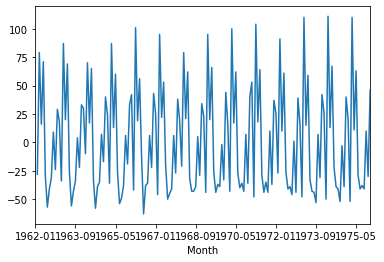

In [44]:
df['Milk First Difference'].plot()

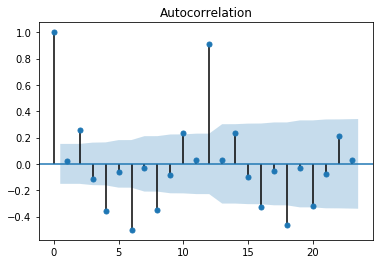

In [45]:
# check how autocorrelation works in the data by importing library to implement ACF plot.
from statsmodels.graphics.tsaplots import plot_acf
fig_first = plot_acf(df["Milk First Difference"].dropna())
#We can see that the data is showing similar fluctuations in the lagged observations which confirm that they are correlated.

In [46]:
#Now it’s time to perform ARIMA. Please note we have seasonal data! So, we will use SARIMA
model = sm.tsa.statespace.SARIMAX(df['Milk in pounds per cow'],order=(0,1,0), seasonal_order=(1,1,1,12))
ARIMAresult = model.fit()
print(ARIMAresult.summary())

#the main thing to observe is the AIC which should be minimum. To improve our model,
#we can play around changing the p,d,q parameters and the model which gives the least AIC is the best model.

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:               Milk in pounds per cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Sat, 25 Apr 2020   AIC                           1074.131
Time:                                      09:05:32   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

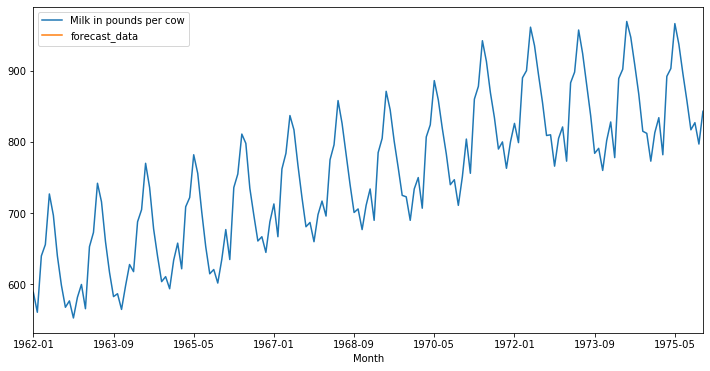

In [51]:
#predict the future values
df['forecast_data'] = ARIMAresult.predict(start = 150, end= 168, dynamic= True)  
df [['Milk in pounds per cow','forecast_data']].plot(figsize= (12,6))